# Adaptive data augmentation

## 📌 Import thư viện

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



## 📌 1. Hàm vẽ histogram của ảnh

In [18]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title(title)

## 📌 2. Hàm Gamma Correction

In [20]:
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

## 📌 3. Đọc ảnh gốc (ảnh đầu vào)

In [21]:
image_path = "Training_596387.jpg"  # Đổi thành đường dẫn ảnh của bạn
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

## 📌 4. Áp dụng Gamma Correction (gamma < 1 để làm sáng ảnh)

In [28]:
gamma_corrected = gamma_correction(image, gamma=0.7)

## 📌 5. Áp dụng Histogram Equalization

In [29]:
hist_equalized = cv2.equalizeHist(image)

## 📌 6. Vẽ biểu đồ histogram trước & sau khi tăng cường

In [30]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

## Histogram của ảnh gốc

(np.float64(-0.5), np.float64(47.5), np.float64(47.5), np.float64(-0.5))

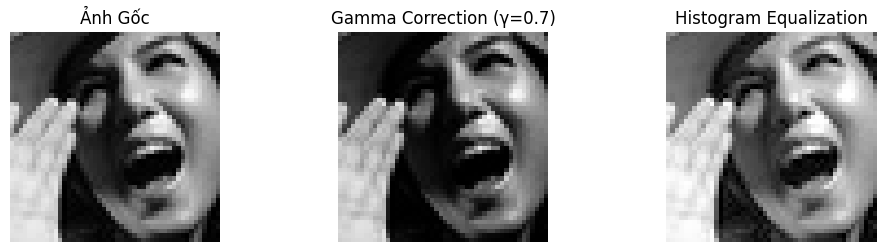

In [35]:
plt.figure(figsize=(12, 6))  # Mở rộng kích thước figure
plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Ảnh Gốc")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gamma_corrected, cmap="gray")
plt.title("Gamma Correction (γ=0.7)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(hist_equalized, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

## Histogram

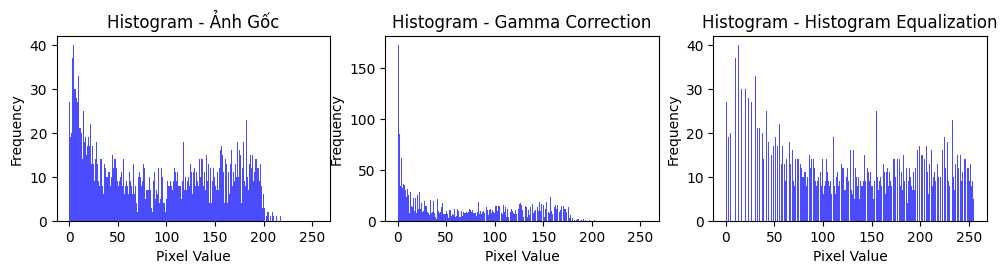

In [34]:
plt.figure(figsize=(12, 6))  # Mở rộng kích thước figure

plt.subplot(2, 3, 4)
plot_histogram(image, "Histogram - Ảnh Gốc")

plt.subplot(2, 3, 5)
plot_histogram(gamma_corrected, "Histogram - Gamma Correction")

plt.subplot(2, 3, 6)
plot_histogram(hist_equalized, "Histogram - Histogram Equalization")

plt.subplots_adjust(hspace=0.5)  # Tăng khoảng cách giữa các hàng
plt.show()